# COVID-19 Status (Colombia)

##### Limpieza y ajuste de datos (Desarrollador)*

In [1]:
# Libraries import
from datetime import datetime
from plotly.offline import init_notebook_mode, iplot
import requests
import pandas as pd
import numpy as np
import plotly.graph_objs as go
from googletrans import Translator
import matplotlib.pyplot as plt
import statsmodels.api as sn

In [2]:
# Dataset import - 'Datos abiertos COVID-19 (Colombia)'
data = pd.DataFrame.from_dict(requests.get('https://www.datos.gov.co/resource/gt2j-8ykr.json?$limit=999999999').json())
#data

In [3]:
# Data cleaning and adjusting

# FE DE ERRATAS (2020-05-03): --------------------------------------------------------------------------------------------------------------------------------------------------
#data.loc[(data['Edad'].str.contains('-   -'))] = None
    
data = data[~data['edad'].str.contains('-   -')]
#---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

#translator = Translator()

data.columns = ['Id de caso', 'Fecha de notificación', 'Código DIVIPOLA', 'Ciudad de ubicación', 'Departamento', 'Estado', 'Edad', 'Sexo', 'Tipo', 'Severidad','País de procedencia', 'Fecha de inicio de síntomas', 'Fecha de diagnóstico', 'Fecha de recuperación', 'Fecha de reporte web', 'Tipo de recuperación', 'Código departamento', 'Código país', 'Pertenecia Étnica', 'Fecha de defunción', 'Nombre Grupo Étnico']

for column in ['Ciudad de ubicación', 'Estado', 'Sexo', 'Tipo', 'Severidad', 'País de procedencia']:
    data[column] = data[column].str.capitalize()
    
for column in ['Fecha de notificación', 'Fecha de inicio de síntomas', 'Fecha de defunción', 'Fecha de diagnóstico', 'Fecha de recuperación', 'Fecha de reporte web']:
       data[column] = data[column].str.slice(0,10).replace(r'(\d+)-(\d+)-(\d+)', r'\1-\2-\3', regex=True).apply(lambda x: pd.to_datetime(x, dayfirst=True, errors='ignore'))

data.loc[(data['Edad'].str.contains('[a-zA-Z]+', regex=True)), 'Edad'] = 0
data['Clasificación de edad'] = pd.cut(x=data['Edad'].apply(lambda x: float(x)), bins=[-np.inf,10,20,30,40,50,60,70,80,90,np.inf], include_lowest=True, labels=['0 - 10', '10 - 20', '20 - 30', '30 - 40', '40 - 50', '50 - 60', '60 - 70', '70 - 80', '80 - 90', '90 - 100+'])

#data['País de procedencia'] = data['País de procedencia'].apply(Translator().translate, src='es', dest='en').apply(getattr, args=('text',))

data = data[['Id de caso', 'Fecha de reporte web', 'Fecha de diagnóstico', 'Fecha de notificación', 'Fecha de inicio de síntomas', 'Fecha de recuperación', 'Fecha de defunción', 'Ciudad de ubicación', 'Departamento', 'Severidad', 'Estado', 'Edad', 'Clasificación de edad', 'Sexo', 'Pertenecia Étnica', 'Nombre Grupo Étnico', 'Tipo', 'Tipo de recuperación', 'País de procedencia', 'Código departamento', 'Código país', 'Código DIVIPOLA']]
data = data.set_index('Id de caso')

date = datetime.today().strftime('%Y-%m-%d')
data.to_csv(f'./Datasets/COVID-19 Status (Colombia) [{date}].csv', index = True)

def numbers(div):
    for i in range(0, len(ax.patches)//div, 1):
        height = 0
        for j in range(0, div, 1):
            height += ax.patches[j*(len(ax.patches)//div)+i].get_height()
        ax.text(ax.patches[i].get_x()+(ax.patches[i].get_width()/10),height+(height/100)+10, int(height), fontsize=7, color='dimgrey', rotation=90)

def numbers_H(div):
    for i in range(0, len(ax.patches)//div, 1):
        width = 0
        for j in range(0, div, 1):
            width += ax.patches[j*(len(ax.patches)//div)+i].get_width()
        ax.text(width+(width/100)+10,ax.patches[i].get_y()+(ax.patches[i].get_height()/10), int(width), fontsize=7, color='dimgrey', rotation=0)

In [4]:
# Test

#data['País de procedencia'].unique().apply(lambda x: Translator().translate(x, src='es', dest='en').text)
#Translator().translate('España', src='es', dest='en').text

In [5]:
# In-line plots libraries import

%matplotlib inline
init_notebook_mode(connected = True)

## Análisis Dataset - COVID-19 (Colombia)

### - Datos Abiertos COVID-19 (Colombia)

In [6]:
data

Fecha de reporte web Fecha de diagnóstico Fecha de notificación  \
Id de caso                                                                   
1                    2020-03-06           2020-03-06            2020-03-02   
2                    2020-03-09           2020-03-09            2020-03-06   
3                    2020-03-09           2020-03-09            2020-03-07   
4                    2020-03-11           2020-03-11            2020-03-09   
5                    2020-03-11           2020-03-11            2020-03-09   
...                         ...                  ...                   ...   
335015               2020-08-04           2020-08-02            2020-07-26   
335016               2020-08-04           2020-08-03            2020-07-28   
335017               2020-08-04           2020-08-03            2020-07-28   
335018               2020-08-04           2020-08-02            2020-07-28   
335019               2020-08-04           2020-08-03            2020-07-31   

           Fecha de inicio de síntomas Fecha de recuperación  \
Id de caso                                                     
1                  2020-02-27 00:00:00            2020-03-13   
2                  2020-03-04 00:00:00            2020-03-19   
3                  2020-02-29 00:00:00            2020-03-15   
4                  2020-03-06 00:00:00            2020-03-26   
5                  2020-03-08 00:00:00            2020-03-23   
...                                ...                   ...   
335015                      Asintomáti                   NaT   
335016                      Asintomáti                   NaT   
335017                      Asintomáti                   NaT   
335018                      Asintomáti                   NaT   
335019                      Asintomáti                   NaT   

           Fecha de defunción  Ciudad de ubicación     Departamento  \
Id de caso                                                            
1                         NaT          Bogotá d.c.      Bogotá D.C.   
2                         NaT  Guadalajara de buga  Valle del Cauca   
3                         NaT             Medellín        Antioquia   
4                         NaT             Medellín        Antioquia   
5                         NaT             Medellín        Antioquia   
...                       ...                  ...              ...   
335015                    NaT          Bogotá d.c.      Bogotá D.C.   
335016                    NaT          Bogotá d.c.      Bogotá D.C.   
335017                    NaT          Bogotá d.c.      Bogotá D.C.   
335018                    NaT          Bogotá d.c.      Bogotá D.C.   
335019                    NaT          Bogotá d.c.      Bogotá D.C.   

               Severidad      Estado  ... Clasificación de edad Sexo  \
Id de caso                            ...                              
1                   Leve  Recuperado  ...               10 - 20    F   
2                   Leve  Recuperado  ...               30 - 40    M   
3                   Leve  Recuperado  ...               40 - 50    F   
4                   Leve  Recuperado  ...               50 - 60    M   
5                   Leve  Recuperado  ...               20 - 30    M   
...                  ...         ...  ...                   ...  ...   
335015      Asintomático        Casa  ...               60 - 70    M   
335016      Asintomático        Casa  ...               30 - 40    M   
335017      Asintomático        Casa  ...               40 - 50    F   
335018      Asintomático        Casa  ...               50 - 60    F   
335019      Asintomático        Casa  ...               70 - 80    F   

           Pertenecia Étnica Nombre Grupo Étnico         Tipo  \
Id de caso                                                      
1                       Otro                 NaN    Importado   
2                       Otro                 NaN    Importado   
3                       Otro              

### - Mapa de influencia - COVID-19 (Colombia) [Beta]

In [7]:
map_data = dict(
    type = 'choropleth',
    locations = data['País de procedencia'],
    locationmode = 'country names',
    colorscale = 'viridis',
    z = data['País de procedencia'].value_counts().tolist())

geo_map = go.Figure(data=[map_data])
iplot(geo_map)

### - Casos confirmados VS Departamento (Sexo)

In [8]:
data.groupby(['Departamento', 'Sexo']).size().unstack().fillna(0)

Sexo                                                    F      M
Departamento                                                    
Amazonas                                             1058   1455
Antioquia                                           19320  22658
Arauca                                                 55    193
Archipiélago de San Andrés Providencia y Santa ...     16     29
Atlántico                                           11257  12577
Barranquilla D.E.                                   14539  16833
Bogotá D.C.                                         55934  57614
Bolívar                                              1272   1605
Boyacá                                                600    639
Buenaventura D.E.                                     794   1351
Caldas                                                540    521
Caquetá                                               802    845
Cartagena D.T. y C.                                  7434   8995
Casanare                                              161    205
Cauca                                                 954   1227
Cesar                                                1625   2110
Chocó                                                1410   1688
Cundinamarca                                         5091   5140
Córdoba                                              3565   3684
Guainía                                                 6      8
Guaviare                                               14    101
Huila                                                 574    590
La Guajira                                           1145   1237
Magdalena                                            1166   1229
Meta                                                  861   2213
Nariño                                               3989   4607
Norte de Santander                                   1319   1768
Putumayo                                              542    666
Quindío                                               211    198
Risaralda                                            1088   1060
Santa Marta D.T. y C.                                2302   2503
Santander                                            1995   2757
Sucre                                                3012   3485
Tolima                                               1043   1978
Valle del Cauca                                     12009  13438
Vaupés                                                 27     34
Vichada                                                 3      5

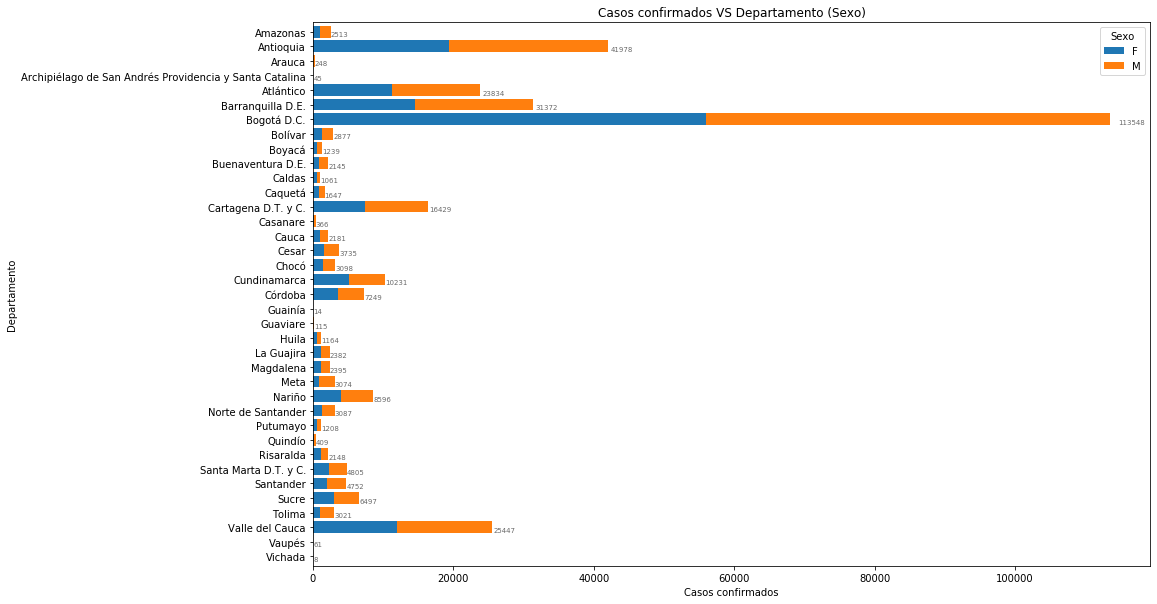

In [9]:
ax = data.groupby(['Departamento', 'Sexo']).size().unstack().fillna(0).sort_index(ascending=False).plot(kind='barh', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Departamento (Sexo)'))
ax.set_xlabel('Casos confirmados')
div = len(data['Sexo'].unique())
numbers_H(div)

### - Casos confirmados VS Departamento (Clasificación de edad)

In [10]:
data.groupby(['Departamento', 'Clasificación de edad']).size().unstack().fillna(0)

Clasificación de edad                               0 - 10  10 - 20  20 - 30  \
Departamento                                                                   
Amazonas                                               133      452      510   
Antioquia                                             1434     2954    11040   
Arauca                                                   9       52       92   
Archipiélago de San Andrés Providencia y Santa ...       0        1       14   
Atlántico                                             1083     1884     5113   
Barranquilla D.E.                                     1210     2072     6820   
Bogotá D.C.                                           4941     8602    26047   
Bolívar                                                143      274      657   
Boyacá                                                  68      128      261   
Buenaventura D.E.                                       46      283      495   
Caldas                                                  40       74      235   
Caquetá                                                 53       97      466   
Cartagena D.T. y C.                                    756     1217     3749   
Casanare                                                17       18      104   
Cauca                                                   98      180      511   
Cesar                                                  232      327      881   
Chocó                                                  131      273      739   
Cundinamarca                                           486      768     2377   
Córdoba                                                222      413     1478   
Guainía                                                  0        2        4   
Guaviare                                                 1       33       26   
Huila                                                   62      110      262   
La Guajira                                             127      234      492   
Magdalena                                              129      172      445   
Meta                                                    63      256      958   
Nariño                                                 384      719     2001   
Norte de Santander                                      92      141      718   
Putumayo                                                34      103      358   
Quindío                                                 13       22       88   
Risaralda                                              123      194      504   
Santa Marta D.T. y C.                                  199      330     1064   
Santander                                              178      315     1082   
Sucre                                                  260      518     1360   
Tolima                                                 134      183      843   
Valle del Cauca                                        837     1679     5807   
Vaupés                                                   4        5       19   
Vichada                                                  1        5        1   

Clasificación de edad                               30 - 40  40 - 50  50 - 60  \
Departamento                                                                    
Amazonas                                                481      342      276   
Antioquia                                             10555     6504     4966   
Arauca                                                   59       20        8   
Archipiélago de San Andrés Providencia y Santa ...       12       10        5   
Atlántico                                              5486     3787     3121   
Barranquilla D.E.                                      7433     4930     4216   
Bogotá D.C.                                           25163    18389    15376   
Bolívar                                                 670      400      262   
Boyacá                                                  235      200 

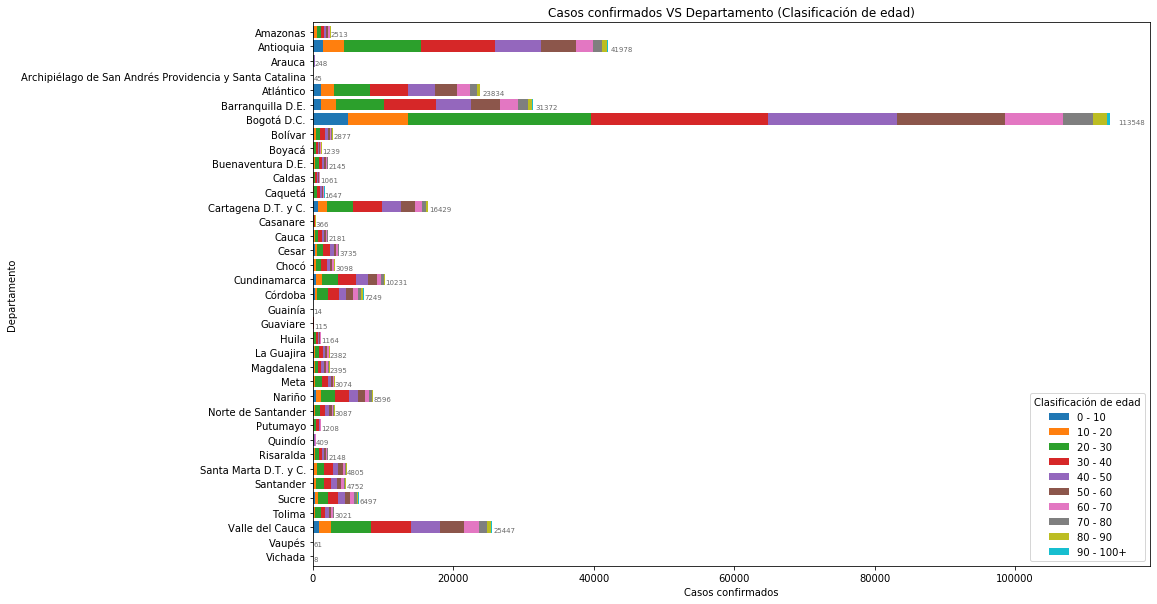

In [11]:
ax = data.groupby(['Departamento', 'Clasificación de edad']).size().unstack().fillna(0).sort_index(ascending=False).plot(kind='barh', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Departamento (Clasificación de edad)'))
ax.set_xlabel('Casos confirmados')
div = len(data['Clasificación de edad'].unique())
numbers_H(div)

### - Casos confirmados VS Departamento (Estado)

In [12]:
data.groupby(['Departamento', 'Estado']).size().unstack().fillna(0)

Estado                                                 Casa  Fallecido  \
Departamento                                                             
Amazonas                                               43.0      104.0   
Antioquia                                           25237.0      655.0   
Arauca                                                 81.0        5.0   
Archipiélago de San Andrés Providencia y Santa ...     10.0        0.0   
Atlántico                                            4570.0     1096.0   
Barranquilla D.E.                                    5033.0     1502.0   
Bogotá D.C.                                         49191.0     3169.0   
Bolívar                                              1060.0      129.0   
Boyacá                                                570.0       31.0   
Buenaventura D.E.                                     206.0      147.0   
Caldas                                                661.0       15.0   
Caquetá                                              1121.0       41.0   
Cartagena D.T. y C.                                  2745.0      476.0   
Casanare                                              178.0        6.0   
Cauca                                                 860.0       74.0   
Cesar                                                1613.0       75.0   
Chocó                                                 469.0      106.0   
Cundinamarca                                         4038.0      279.0   
Córdoba                                              3273.0      756.0   
Guainía                                                 0.0        1.0   
Guaviare                                               55.0        0.0   
Huila                                                 556.0       27.0   
La Guajira                                            774.0      134.0   
Magdalena                                             530.0      222.0   
Meta                                                 1011.0       44.0   
Nariño                                               2640.0      282.0   
Norte de Santander                                   1737.0      145.0   
Putumayo                                              775.0       47.0   
Quindío                                               173.0        9.0   
Risaralda                                            1155.0       41.0   
Santa Marta D.T. y C.                                1885.0      169.0   
Santander                                            2412.0      145.0   
Sucre                                                1866.0      386.0   
Tolima                                               1137.0       62.0   
Valle del Cauca                                      8425.0      934.0   
Vaupés                                                  1.0        1.0   
Vichada                                                 6.0        0.0   

Estado                                              Hospital  Hospital uci  \
Departamento                                                                 
Amazonas                                                 6.0           4.0   
Antioquia                                             1509.0         164.0   
Arauca                                                   5.0           3.0   
Archipiélago de San Andrés Providencia y Santa ...       1.0           1.0   
Atlántico                                              507.0          78.0   
Barranquilla D.E.                                      714.0          79.0   
Bogotá D.C.                                           5675.0         323.0   
Bolívar                                                115.0          10.0   
Boyacá                                                  69.0           7.0   
Buenaventura D.E.                                      104.0          25.0   
Caldas                                                  39.0          10.0   
Caquetá                                                119.0           5.0   
Cartagena D.T. y C.  

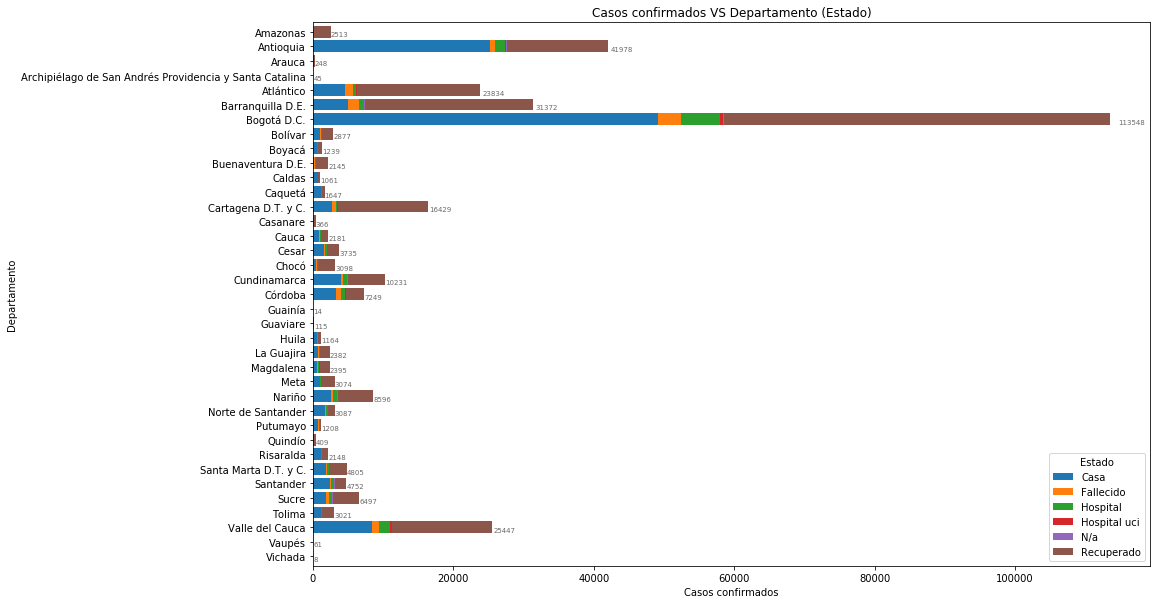

In [13]:
ax = data.groupby(['Departamento', 'Estado']).size().unstack().fillna(0).sort_index(ascending=False).plot(kind='barh', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Departamento (Estado)'))
ax.set_xlabel('Casos confirmados')
div = len(data['Estado'].unique())
numbers_H(div)

### - Casos confirmados VS Estado (Sexo)

In [14]:
data.groupby(['Estado', 'Sexo']).size().unstack().fillna(0)

Sexo              F      M
Estado                    
Casa          61334  64763
Fallecido      4099   7216
Hospital       6432   8634
Hospital uci    539   1014
N/a             292    398
Recuperado    85037  95221

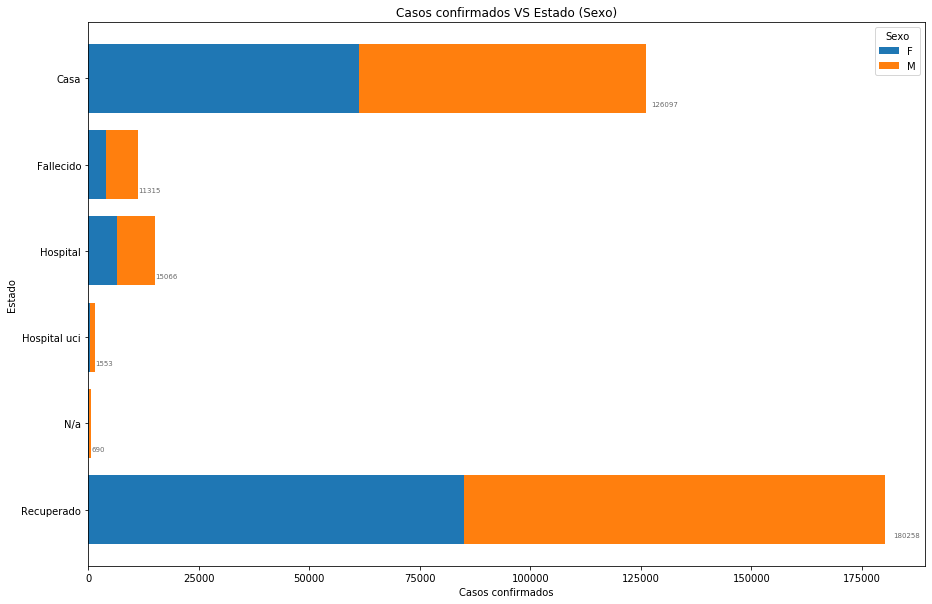

In [15]:
ax = data.groupby(['Estado', 'Sexo']).size().unstack().fillna(0).sort_index(ascending=False).plot(kind='barh', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Estado (Sexo)'))
ax.set_xlabel('Casos confirmados')
div = len(data['Sexo'].unique())
numbers_H(div)

### - Casos confirmados VS Estado (Clasificación de edad)

In [16]:
data.groupby(['Estado', 'Clasificación de edad']).size().unstack().fillna(0)

Clasificación de edad  0 - 10  10 - 20  20 - 30  30 - 40  40 - 50  50 - 60  \
Estado                                                                       
Casa                     5040     9855    31365    31058    20572    15621   
Fallecido                  24       19      160      389      876     1714   
Hospital                  595      306     1118     1759     2235     3112   
Hospital uci               72       27       60      162      234      376   
N/a                        19       15       31       28       52       84   
Recuperado               7993    14868    44887    44150    28838    21929   

Clasificación de edad  60 - 70  70 - 80  80 - 90  90 - 100+  
Estado                                                       
Casa                      7505     3449     1381        251  
Fallecido                 2699     2847     2104        483  
Hospital                  2960     1933      926        122  
Hospital uci               350      212       55          5  
N/a                        135      153      134         39  
Recuperado               10780     4688     1837        288

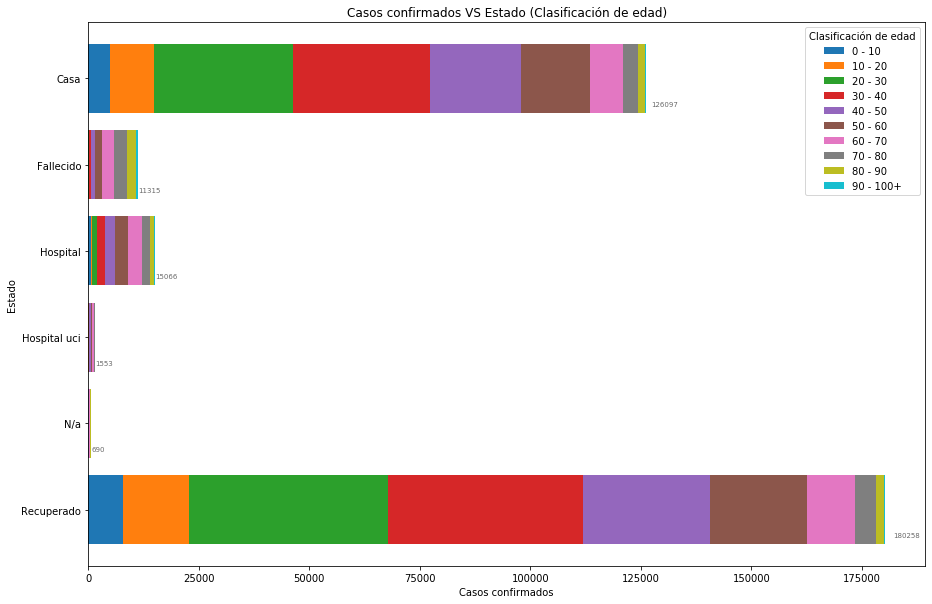

In [17]:
ax = data.groupby(['Estado', 'Clasificación de edad']).size().unstack().fillna(0).sort_index(ascending=False).plot(kind='barh', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Estado (Clasificación de edad)'))
ax.set_xlabel('Casos confirmados')
div = len(data['Clasificación de edad'].unique())
numbers_H(div)

### - Casos confirmados VS Tipo de contagio (Sexo)

In [18]:
data.groupby(['Tipo', 'Sexo']).size().unstack().fillna(0)

Sexo                F         M
Tipo                           
En estudio   150841.0  161824.0
Importado       456.0     520.0
Relacionado    6436.0   14901.0
Relcionado        0.0       1.0

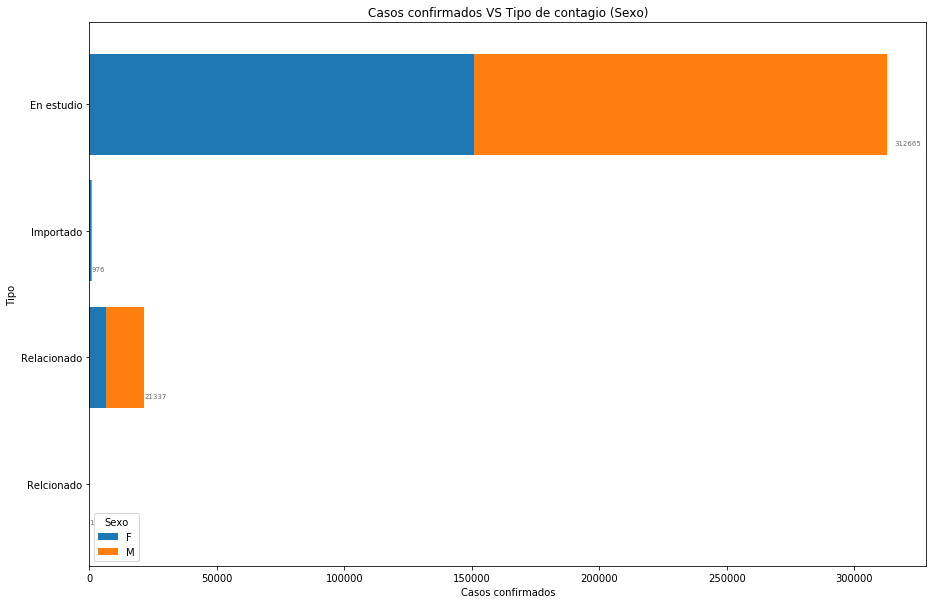

In [19]:
ax = data.groupby(['Tipo', 'Sexo']).size().unstack().fillna(0).sort_index(ascending=False).plot(kind='barh', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Tipo de contagio (Sexo)'))
ax.set_xlabel('Casos confirmados')
div = len(data['Sexo'].unique())
numbers_H(div)

### - Casos confirmados VS Tipo (Clasificación de edad)

In [20]:
data.groupby(['Tipo', 'Clasificación de edad']).size().unstack().fillna(0)

Clasificación de edad  0 - 10  10 - 20  20 - 30  30 - 40  40 - 50  50 - 60  \
Tipo                                                                         
En estudio              12818    22544    71463    72122    49766    40647   
Importado                   6       37      241      230      173      150   
Relacionado               919     2508     5917     5194     2868     2039   
Relcionado                  0        1        0        0        0        0   

Clasificación de edad  60 - 70  70 - 80  80 - 90  90 - 100+  
Tipo                                                         
En estudio               23295    12752     6138       1120  
Importado                   94       35        9          1  
Relacionado               1040      495      290         67  
Relcionado                   0        0        0          0

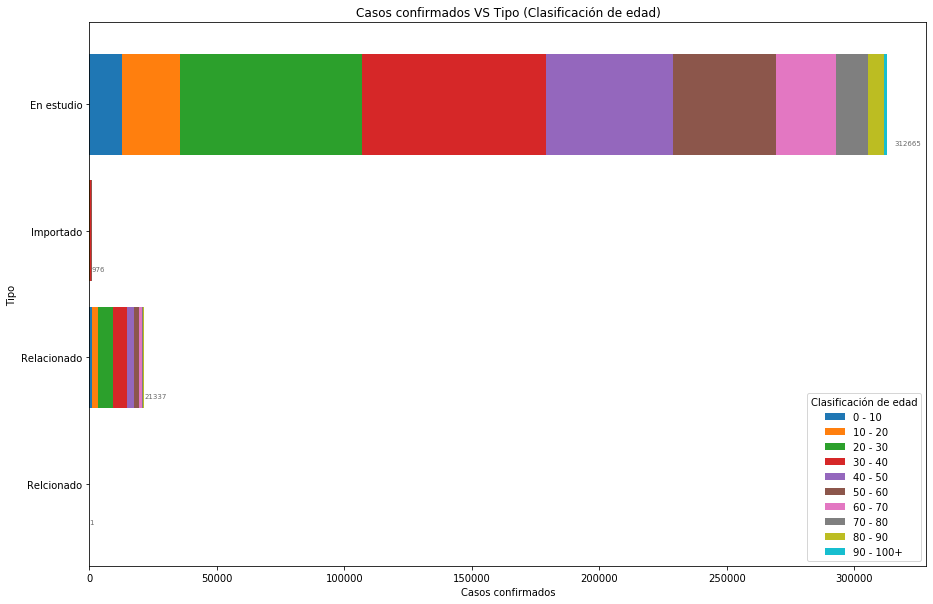

In [21]:
ax = data.groupby(['Tipo', 'Clasificación de edad']).size().unstack().fillna(0).sort_index(ascending=False).plot(kind='barh', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Tipo (Clasificación de edad)'))
ax.set_xlabel('Casos confirmados')
div = len(data['Clasificación de edad'].unique())
numbers_H(div)

### - Casos confirmados VS Clasificación de edad (Sexo)

In [22]:
data.groupby(['Clasificación de edad', 'Sexo']).size().unstack().fillna(0)

Sexo                       F      M
Clasificación de edad              
0 - 10                  6730   7013
10 - 20                11636  13454
20 - 30                37360  40261
30 - 40                35886  41660
40 - 50                24915  27892
50 - 60                20083  22753
60 - 70                11254  13175
70 - 80                 6017   7265
80 - 90                 3171   3266
90 - 100+                681    507

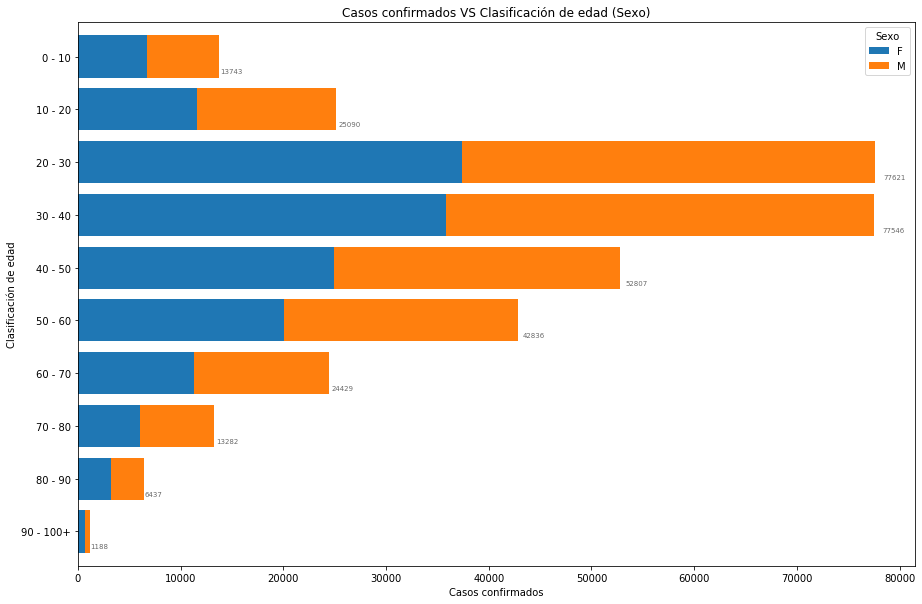

In [23]:
ax = data.groupby(['Clasificación de edad', 'Sexo']).size().unstack().fillna(0).sort_index(ascending=False).plot(kind='barh', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Clasificación de edad (Sexo)'))
ax.set_xlabel('Casos confirmados')
div = len(data['Sexo'].unique())
numbers_H(div)

### - Casos confirmados VS Clasificación de edad (Estado)

In [24]:
data.groupby(['Clasificación de edad', 'Estado']).size().unstack().fillna(0)

Estado                  Casa  Fallecido  Hospital  Hospital uci  N/a  \
Clasificación de edad                                                  
0 - 10                  5040         24       595            72   19   
10 - 20                 9855         19       306            27   15   
20 - 30                31365        160      1118            60   31   
30 - 40                31058        389      1759           162   28   
40 - 50                20572        876      2235           234   52   
50 - 60                15621       1714      3112           376   84   
60 - 70                 7505       2699      2960           350  135   
70 - 80                 3449       2847      1933           212  153   
80 - 90                 1381       2104       926            55  134   
90 - 100+                251        483       122             5   39   

Estado                 Recuperado  
Clasificación de edad              
0 - 10                       7993  
10 - 20                     14868  
20 - 30                     44887  
30 - 40                     44150  
40 - 50                     28838  
50 - 60                     21929  
60 - 70                     10780  
70 - 80                      4688  
80 - 90                      1837  
90 - 100+                     288

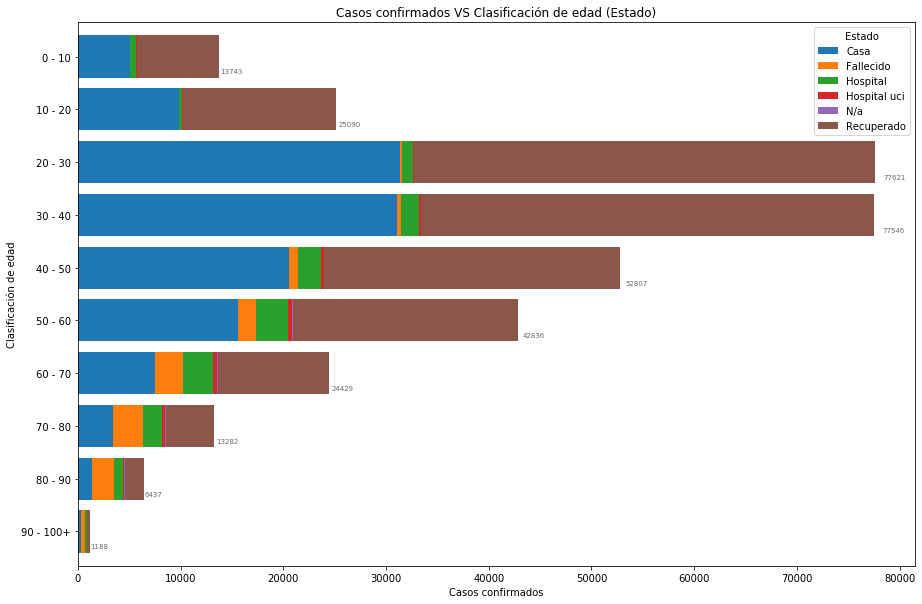

In [25]:
ax = data.groupby(['Clasificación de edad', 'Estado']).size().unstack().fillna(0).sort_index(ascending=False).plot(kind='barh', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Clasificación de edad (Estado)'))
ax.set_xlabel('Casos confirmados')
div = len(data['Estado'].unique())
numbers_H(div)

### - Casos confirmados VS Fecha de diagnóstico (Sexo)

In [26]:
data.groupby(['Fecha de diagnóstico', 'Sexo']).size().unstack().fillna(0)

Sexo                       F       M
Fecha de diagnóstico                
2020-03-06               1.0     0.0
2020-03-09               1.0     1.0
2020-03-11               4.0     2.0
2020-03-12               5.0     0.0
2020-03-13               2.0     3.0
...                      ...     ...
2020-07-31            3017.0  3009.0
2020-08-01            4711.0  4994.0
2020-08-02            4786.0  4563.0
2020-08-03            2120.0  2305.0
2020-08-04              25.0    29.0

[149 rows x 2 columns]

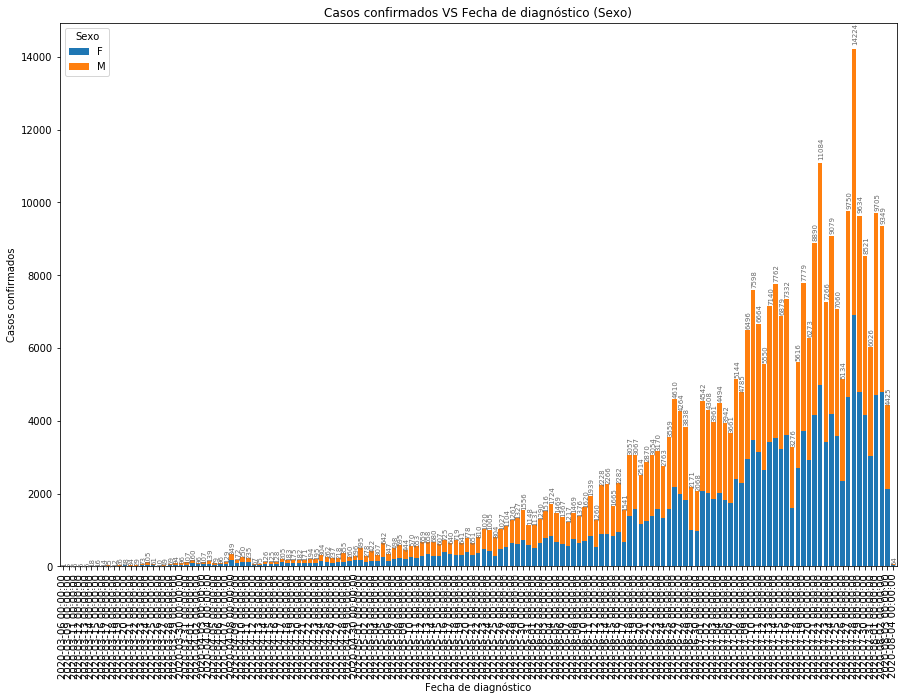

In [27]:
ax = data.groupby(['Fecha de diagnóstico', 'Sexo']).size().unstack().fillna(0).plot(kind='bar', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Fecha de diagnóstico (Sexo)'))
ax.set_ylabel('Casos confirmados')
div = len(data['Sexo'].unique())
numbers(div)

### - Casos confirmados VS Fecha de diagnóstico (Clasificación de edad)

In [28]:
data.groupby(['Fecha de diagnóstico', 'Clasificación de edad']).size().unstack().fillna(0)

Clasificación de edad  0 - 10  10 - 20  20 - 30  30 - 40  40 - 50  50 - 60  \
Fecha de diagnóstico                                                         
2020-03-06                  0        1        0        0        0        0   
2020-03-09                  0        0        0        1        1        0   
2020-03-11                  0        0        4        0        0        1   
2020-03-12                  0        0        0        1        1        1   
2020-03-13                  0        0        1        0        2        0   
...                       ...      ...      ...      ...      ...      ...   
2020-07-31                232      389     1356     1427     1042      736   
2020-08-01                372      748     2354     2326     1491     1231   
2020-08-02                395      629     2114     2085     1582     1321   
2020-08-03                113      316     1019     1030      686      610   
2020-08-04                  0        2       10        9        9        9   

Clasificación de edad  60 - 70  70 - 80  80 - 90  90 - 100+  
Fecha de diagnóstico                                         
2020-03-06                   0        0        0          0  
2020-03-09                   0        0        0          0  
2020-03-11                   0        0        1          0  
2020-03-12                   1        1        0          0  
2020-03-13                   2        0        0          0  
...                        ...      ...      ...        ...  
2020-07-31                 433      275      119         17  
2020-08-01                 640      354      159         30  
2020-08-02                 663      365      164         31  
2020-08-03                 348      187      102         14  
2020-08-04                   6        5        3          1  

[149 rows x 10 columns]

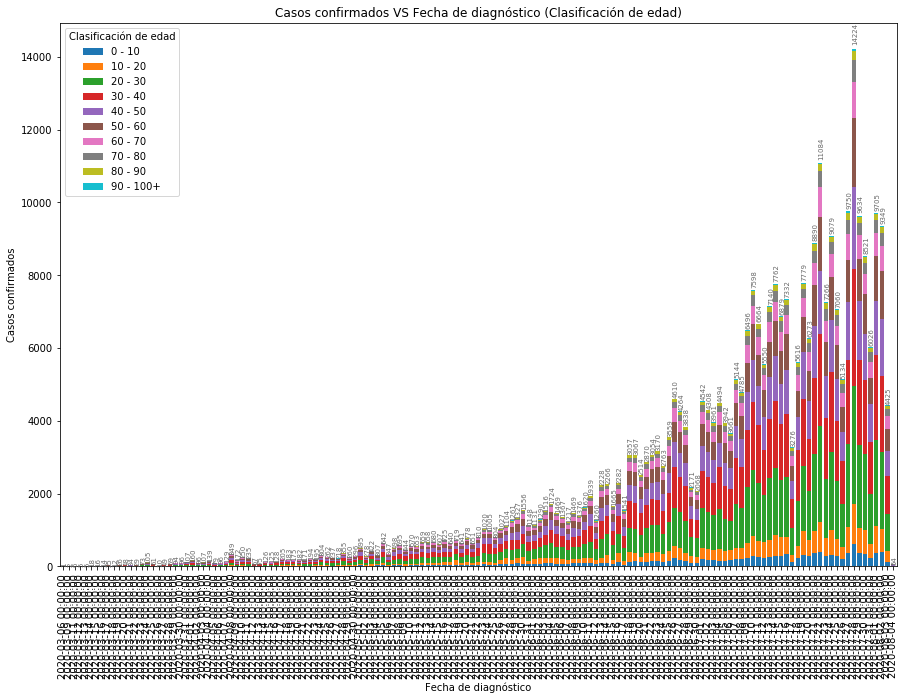

In [29]:
ax = data.groupby(['Fecha de diagnóstico', 'Clasificación de edad']).size().unstack().fillna(0).plot(kind='bar', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Fecha de diagnóstico (Clasificación de edad)'))
ax.set_ylabel('Casos confirmados')
div = len(data['Clasificación de edad'].unique())
numbers(div)

### - Casos confirmados VS Fecha de diagnóstico (Estado)

In [30]:
data.groupby(['Fecha de diagnóstico', 'Estado']).size().unstack().fillna(0)

Estado                  Casa  Fallecido  Hospital  Hospital uci  N/a  \
Fecha de diagnóstico                                                   
2020-03-06               0.0        0.0       0.0           0.0  0.0   
2020-03-09               0.0        0.0       0.0           0.0  0.0   
2020-03-11               0.0        0.0       0.0           0.0  0.0   
2020-03-12               0.0        0.0       0.0           0.0  0.0   
2020-03-13               0.0        0.0       0.0           0.0  0.0   
...                      ...        ...       ...           ...  ...   
2020-07-31            5580.0       97.0     318.0          24.0  4.0   
2020-08-01            8901.0      149.0     571.0          22.0  7.0   
2020-08-02            8610.0      132.0     578.0          11.0  4.0   
2020-08-03            4042.0        5.0     348.0          30.0  0.0   
2020-08-04              39.0        0.0      13.0           2.0  0.0   

Estado                Recuperado  
Fecha de diagnóstico              
2020-03-06                   1.0  
2020-03-09                   2.0  
2020-03-11                   6.0  
2020-03-12                   5.0  
2020-03-13                   5.0  
...                          ...  
2020-07-31                   3.0  
2020-08-01                  55.0  
2020-08-02                  14.0  
2020-08-03                   0.0  
2020-08-04                   0.0  

[149 rows x 6 columns]

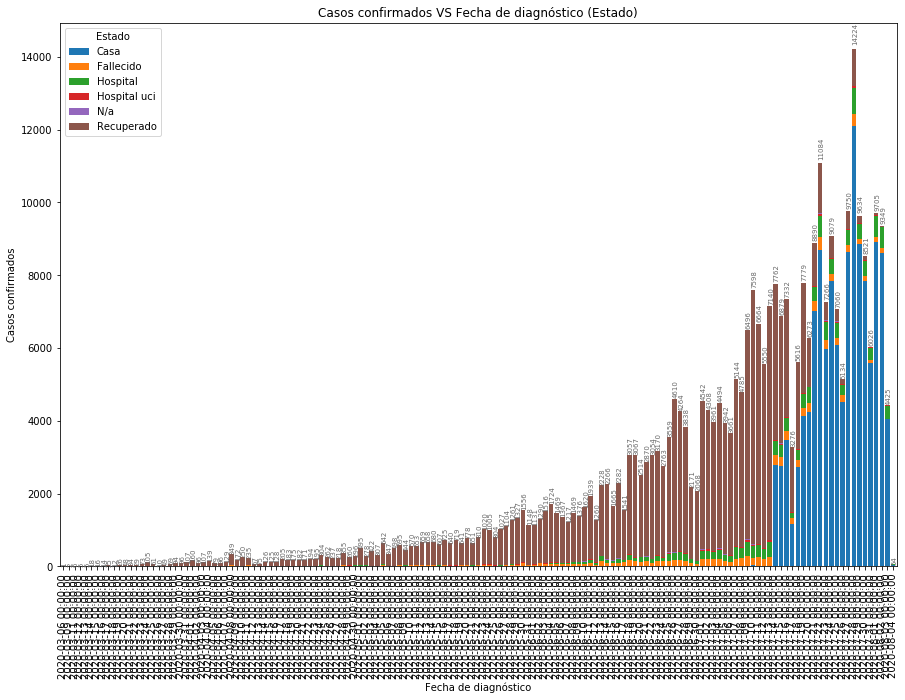

In [31]:
ax = data.groupby(['Fecha de diagnóstico', 'Estado']).size().unstack().fillna(0).plot(kind='bar', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Fecha de diagnóstico (Estado)'))
ax.set_ylabel('Casos confirmados')
div = len(data['Estado'].unique())
numbers(div)

### - Casos confirmados acumulado VS Fecha de diagnóstico (Sexo)

In [32]:
data.groupby(['Fecha de diagnóstico', 'Sexo']).size().unstack().fillna(0).cumsum()

Sexo                         F         M
Fecha de diagnóstico                    
2020-03-06                 1.0       0.0
2020-03-09                 2.0       1.0
2020-03-11                 6.0       3.0
2020-03-12                11.0       3.0
2020-03-13                13.0       6.0
...                        ...       ...
2020-07-31            144308.0  163373.0
2020-08-01            149019.0  168367.0
2020-08-02            153805.0  172930.0
2020-08-03            155925.0  175235.0
2020-08-04            155950.0  175264.0

[149 rows x 2 columns]

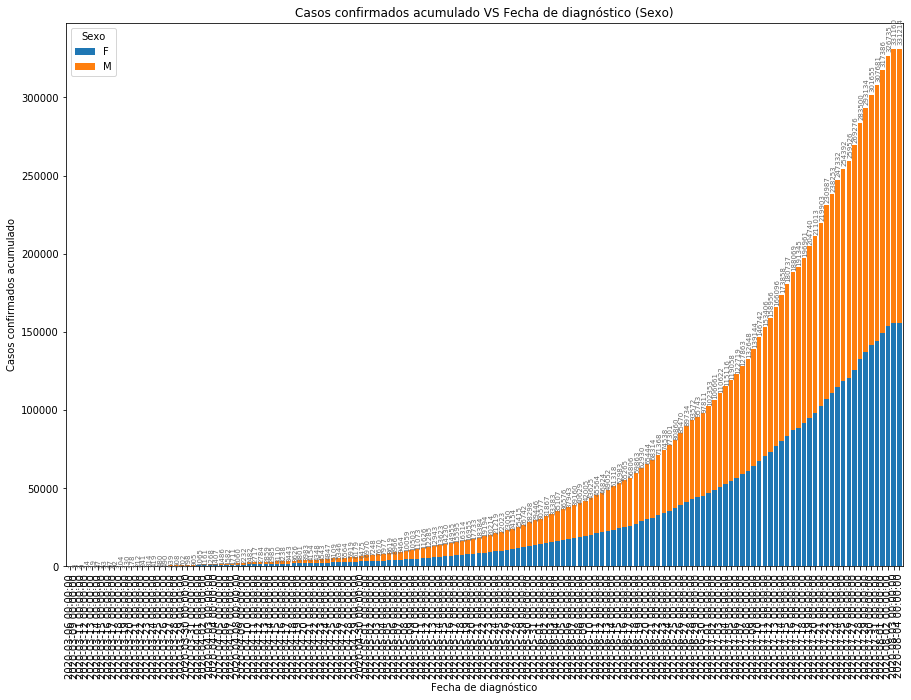

In [33]:
ax = data.groupby(['Fecha de diagnóstico', 'Sexo']).size().unstack().fillna(0).cumsum().plot(kind='bar', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados acumulado VS Fecha de diagnóstico (Sexo)'))
ax.set_ylabel('Casos confirmados acumulado')
div = len(data['Sexo'].unique())
numbers(div)

### - Casos confirmados acumulado VS Fecha de diagnóstico (Clasificación de edad)

In [34]:
data.groupby(['Fecha de diagnóstico', 'Clasificación de edad']).size().unstack().fillna(0).cumsum()

Clasificación de edad  0 - 10  10 - 20  20 - 30  30 - 40  40 - 50  50 - 60  \
Fecha de diagnóstico                                                         
2020-03-06                  0        1        0        0        0        0   
2020-03-09                  0        1        0        1        1        0   
2020-03-11                  0        1        4        1        1        1   
2020-03-12                  0        1        4        2        2        2   
2020-03-13                  0        1        5        2        4        2   
...                       ...      ...      ...      ...      ...      ...   
2020-07-31              12730    23126    71234    71190    48485    39200   
2020-08-01              13102    23874    73588    73516    49976    40431   
2020-08-02              13497    24503    75702    75601    51558    41752   
2020-08-03              13610    24819    76721    76631    52244    42362   
2020-08-04              13610    24821    76731    76640    52253    42371   

Clasificación de edad  60 - 70  70 - 80  80 - 90  90 - 100+  
Fecha de diagnóstico                                         
2020-03-06                   0        0        0          0  
2020-03-09                   0        0        0          0  
2020-03-11                   0        0        1          0  
2020-03-12                   1        1        1          0  
2020-03-13                   3        1        1          0  
...                        ...      ...      ...        ...  
2020-07-31               22478    12212     5924       1102  
2020-08-01               23118    12566     6083       1132  
2020-08-02               23781    12931     6247       1163  
2020-08-03               24129    13118     6349       1177  
2020-08-04               24135    13123     6352       1178  

[149 rows x 10 columns]

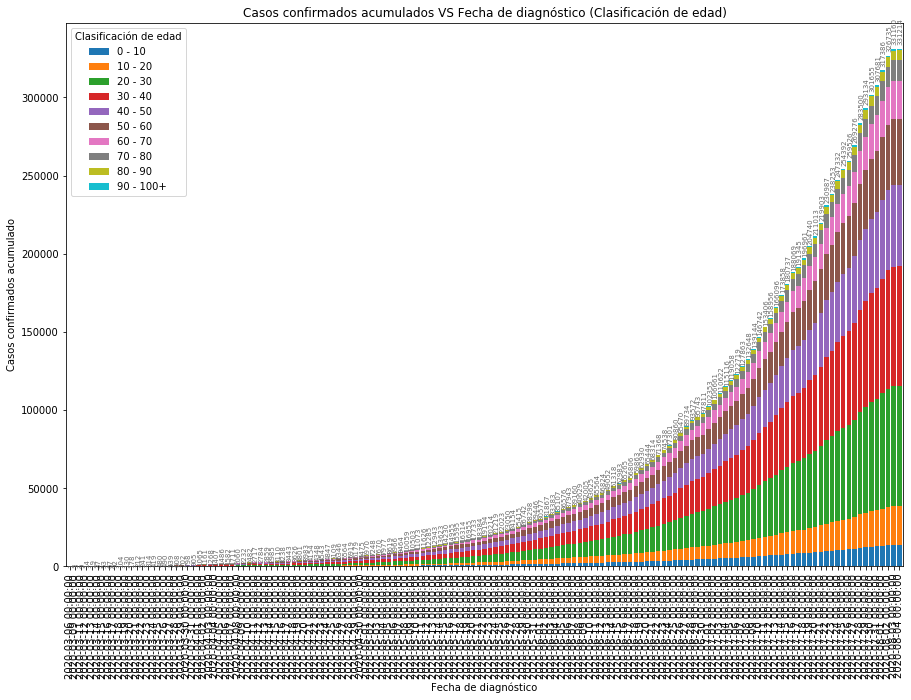

In [35]:
ax = data.groupby(['Fecha de diagnóstico', 'Clasificación de edad']).size().unstack().fillna(0).cumsum().plot(kind='bar', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados acumulados VS Fecha de diagnóstico (Clasificación de edad)'))
ax.set_ylabel('Casos confirmados acumulado')
div = len(data['Clasificación de edad'].unique())
numbers(div)

### - Casos confirmados acumulado VS Fecha de diagnóstico (Estado)

In [36]:
data.groupby(['Fecha de diagnóstico', 'Estado']).size().unstack().fillna(0).cumsum()

Estado                    Casa  Fallecido  Hospital  Hospital uci    N/a  \
Fecha de diagnóstico                                                       
2020-03-06                 0.0        0.0       0.0           0.0    0.0   
2020-03-09                 0.0        0.0       0.0           0.0    0.0   
2020-03-11                 0.0        0.0       0.0           0.0    0.0   
2020-03-12                 0.0        0.0       0.0           0.0    0.0   
2020-03-13                 0.0        0.0       0.0           0.0    0.0   
...                        ...        ...       ...           ...    ...   
2020-07-31            104466.0    10838.0   13428.0        1460.0  658.0   
2020-08-01            113367.0    10987.0   13999.0        1482.0  665.0   
2020-08-02            121977.0    11119.0   14577.0        1493.0  669.0   
2020-08-03            126019.0    11124.0   14925.0        1523.0  669.0   
2020-08-04            126058.0    11124.0   14938.0        1525.0  669.0   

Estado                Recuperado  
Fecha de diagnóstico              
2020-03-06                   1.0  
2020-03-09                   3.0  
2020-03-11                   9.0  
2020-03-12                  14.0  
2020-03-13                  19.0  
...                          ...  
2020-07-31              176831.0  
2020-08-01              176886.0  
2020-08-02              176900.0  
2020-08-03              176900.0  
2020-08-04              176900.0  

[149 rows x 6 columns]

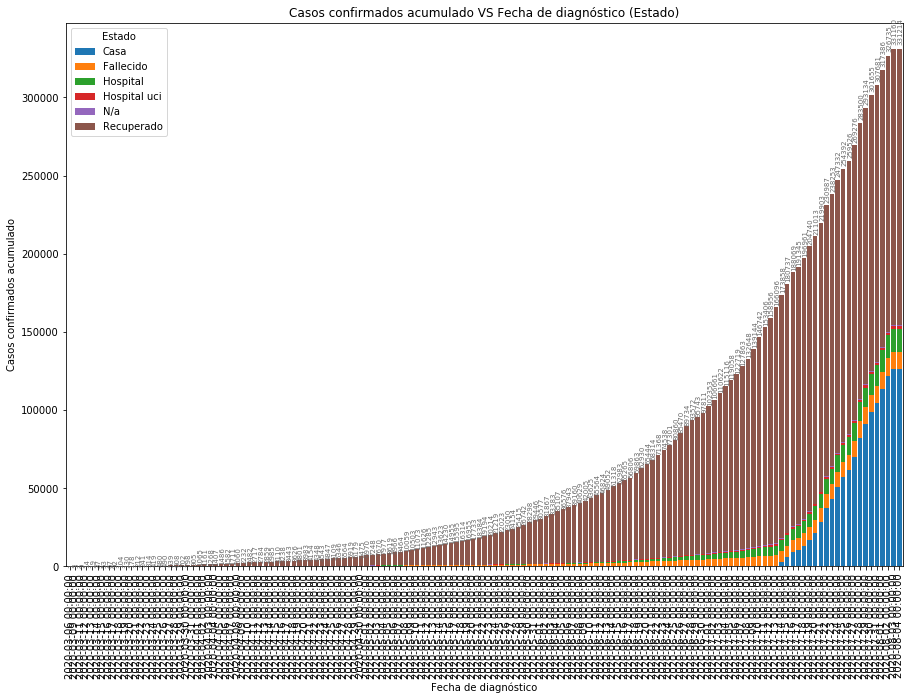

In [37]:
ax = data.groupby(['Fecha de diagnóstico', 'Estado']).size().unstack().fillna(0).cumsum().plot(kind='bar', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados acumulado VS Fecha de diagnóstico (Estado)'))
ax.set_ylabel('Casos confirmados acumulado')
div = len(data['Estado'].unique())
numbers(div)

## #StayHome #QuédateEnCasa

### Made with ♥ by <a href='https://github.com/jlcadavid'>@jlcadavid</a>